In [115]:
import pandas as pd
import os
import shutil

metrics = os.listdir()
for dir in ["json_results","txt_results","figures","excel"]:
    if not os.path.exists(dir):
        os.mkdir(dir)
raw = ""
dict_file = []
for f in metrics:
    if f.endswith(".txt"):
        with open(f, 'r') as file:
            filedata = file.read()
            filedata = filedata.replace("\'","\"")
            with open(os.path.join("json_results",f.split(".txt")[0]+".json"),'w') as fp:
                dict_file.append(fp.name)
                fp.write(filedata)
        shutil.move(f,os.path.join("txt_results",f))

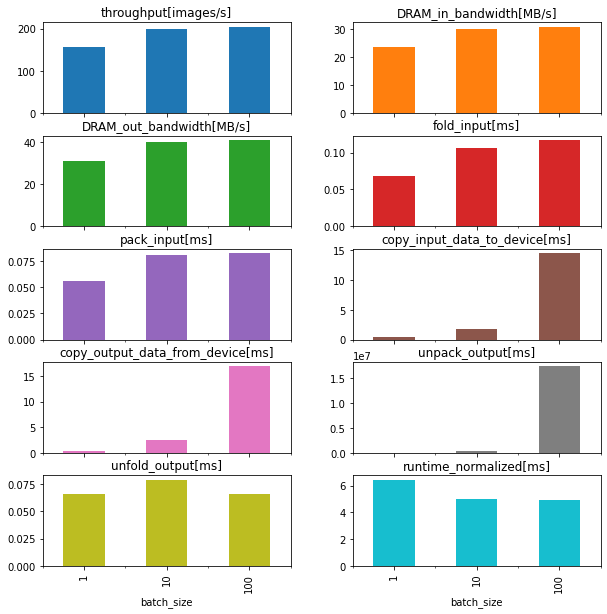

In [118]:
import matplotlib.pyplot as plt
import json
df_list = []
for d in dict_file:
    data = json.load(open(d))
    df_list.append(data)

df = pd.DataFrame(df_list)
df.index = df["batch_size"]
df["runtime_normalized[ms]"] = df["runtime[ms]"]/df.index
df= df.drop(["runtime[ms]","batch_size", "fclk[mhz]"], axis=1)

df.to_excel(os.path.join("excel","runtime_metrics_partition_0.xlsx"), index=True)
df.plot(kind = 'bar',subplots=True,layout=(5,2),
        figsize=(10,10),sharex=True,legend=False)
plt.subplots_adjust(wspace=0.25,hspace=0.25)
plt.savefig(os.path.join("figures","run-metrics-partion-0.png"), dpi=300,facecolor = 'w')